# <center>  ACP and T-SNE

In [1]:
# Library

import pandas as pd
import numpy as np
from scipy.stats import norm, multivariate_normal  
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## PCA

In [2]:
# Gaussian data simulation

n = 100
mean = np.array([0 for i in range(n)])
cov = np.eye(n) 
col = ['X'+str(i) for i in range(n)]
X_1 = pd.DataFrame(np.random.multivariate_normal(mean, cov, (500)),columns=col)
X_1['Class'] = 0
X_2 = pd.DataFrame(np.random.multivariate_normal(mean+3, cov+3, (500)),columns=col)
X_2['Class'] = 1
X = X_1.append(X_2).reset_index(drop=True)

In [3]:
# Data
X.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X91,X92,X93,X94,X95,X96,X97,X98,X99,Class
0,1.055352,0.330819,-1.683345,-1.464089,-1.922995,0.360842,0.548514,0.542992,0.691414,1.290870,...,0.621125,0.566242,-1.219080,-1.383944,2.396040,0.008449,0.387959,0.924071,-0.949439,0
1,0.225268,-0.876040,2.042272,-1.046689,-1.055121,0.426341,-0.091623,0.232271,-1.373602,-1.920561,...,1.107327,-1.223117,-0.175371,1.340502,-2.275469,-0.385797,-1.221569,-1.334036,0.298287,0
2,-0.734292,-1.233739,0.365817,-0.966814,-1.137032,0.781145,0.302608,0.266099,0.961998,-0.070095,...,-0.053908,-1.558002,0.092962,2.097762,0.364733,0.907169,-0.156218,0.371795,0.369602,0
3,-0.330593,-0.012419,-0.568626,1.954051,0.329820,2.863947,-1.223920,-1.728152,-0.264178,-0.868539,...,-0.321510,-0.581781,0.501392,-1.540954,-0.595474,0.345201,1.558028,2.185386,0.984346,0
4,0.032233,-0.400004,1.608771,2.175877,1.190339,0.857848,1.327916,0.271976,-0.487470,0.598741,...,-1.947290,-0.436910,0.261475,2.103573,-0.491240,0.751774,0.112366,-1.935591,1.100116,0


In [4]:
# Center and reduice data
X_center = (X.iloc[:,:100] - X.iloc[:,:100].mean())/X.iloc[:,:100].var()

In [5]:
X_center['Class'] = X['Class']

In [6]:
# PCA with 2 components
n_components = 2
pca = PCA(n_components=n_components,random_state=42)
pca_fit = pca.fit(X_center.iloc[:,:100])
print(f"var explained : {np.sum(pca_fit.explained_variance_ratio_)}")
pca_trans = pca.fit_transform(X_center)
pca_trans

var explained : 0.7936778942000753


array([[-3.02515849, -0.28575002],
       [-3.11565127, -0.26149927],
       [-3.30295992, -0.24671095],
       ...,
       [-1.66267161,  0.68446925],
       [ 6.09768345, -0.09249041],
       [ 5.98277569, -0.1232989 ]])

In [14]:
pd.DataFrame(pca_trans)

,0,1
0,-3.025158,-0.285750
1,-3.115651,-0.261499
2,-3.302960,-0.246711
3,-2.939542,-0.217982
4,-2.784914,-0.222944
...,...,...
995,4.002349,0.137999
996,2.450136,0.325551
997,-1.662672,0.684469
998,6.097683,-0.092490


In [11]:
pca_trans[:500,1]

array([-2.85750024e-01, -2.61499271e-01, -2.46710948e-01, -2.17981782e-01,
       -2.22943619e-01, -2.01754163e-01, -1.47472838e-01, -1.51182036e-01,
       -2.24084527e-01, -1.48019904e-01, -1.41579439e-01, -2.32608975e-01,
       -7.13776659e-02, -1.13258910e-01, -1.59489173e-01, -1.80702325e-01,
       -1.16658637e-01, -3.74485029e-01, -1.94452525e-01, -2.03184057e-01,
       -8.89966530e-02, -7.49849632e-02, -1.95460978e-01, -1.63961019e-01,
       -3.79743122e-02, -2.59134537e-01, -1.98582707e-01, -2.95280984e-02,
       -2.88108456e-01, -5.42864602e-03, -3.70173283e-01,  2.57922102e-02,
       -1.80374424e-01, -1.20952343e-01, -1.51118142e-01, -8.20903361e-02,
       -1.82494907e-01, -3.87562739e-01, -3.43684541e-01, -1.97537771e-01,
       -1.61220724e-01, -1.68133007e-01, -2.68161284e-01, -3.21643655e-01,
       -1.79535403e-01, -1.13075230e-01, -1.86548214e-01, -1.37770126e-01,
       -4.20666148e-02, -1.10614466e-01, -1.75478614e-01, -1.47775687e-01,
       -1.93552635e-01, -

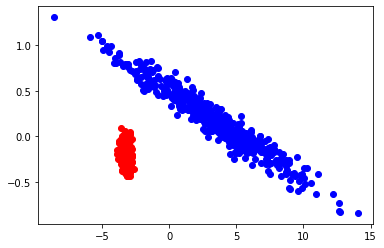

In [16]:
# Plot result
plt.scatter(x=pca_trans[:500,0],y=pca_trans[:500,1],c="red")
plt.scatter(x=pca_trans[500:,0],y=pca_trans[500:,1],c="blue")

In [8]:
# Search for the best number of components based on the explained variance
var_explained = []
n_comp = []
for i in range(2,50):
    n_components = i
    pca_i = PCA(n_components=n_components,random_state=42)
    pca_fit_i = pca_i.fit(X_center.iloc[:,:100])
    var_explained.append(np.sum(pca_fit_i.explained_variance_ratio_))
    n_comp.append(i)

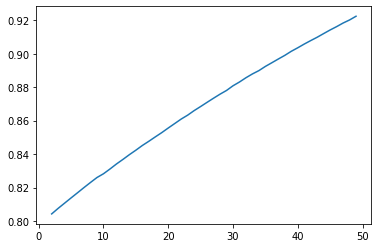

In [9]:
plt.plot(n_comp,var_explained)

## t-SNE

In [18]:
tsne = TSNE(n_components=2)

In [19]:
tsne_fit = tsne.fit_transform(X.iloc[:,:100])

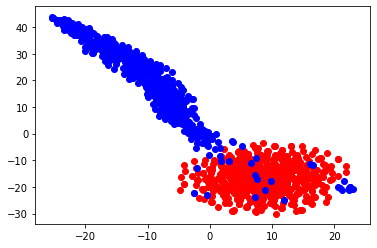

In [20]:
tsne_fit_center = tsne.fit_transform(X_center.iloc[:,:100])
plt.scatter(x=tsne_fit_center[:500,0],y=tsne_fit_center[:500,1],c="red")
plt.scatter(x=tsne_fit_center[500:,0],y=tsne_fit_center[500:,1],c="blue")